### Análise Exploratória dos Dados (EDA)

#### Executando o pre processamento dos dados

In [1]:
from datetime import datetime
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


url = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view'
tables = pd.read_html(url, decimal=',', thousands='.')
df = tables[2]

df = df.drop(index=0).reset_index(drop=True)
df.columns = ['data', 'preco']

df['data'] = pd.to_datetime(df['data'], dayfirst=True, errors='coerce')
df['preco'] = pd.to_numeric(df['preco'], errors='coerce')

df.sort_values(by='data', inplace=True)
df.set_index('data', inplace=True)

startDate = f"{datetime.today().year - 10}-{datetime.today().month }-{datetime.today().day}"
df = df[df.index > startDate].dropna(subset=['preco'])

missing_values = df.isnull().sum()

df = df.dropna()

df_monthly = df.resample('M').mean()

#### Visualização da série temporal: permite identificar visualmente tendências de aumento ou diminuição e possíveis sazonalidades.

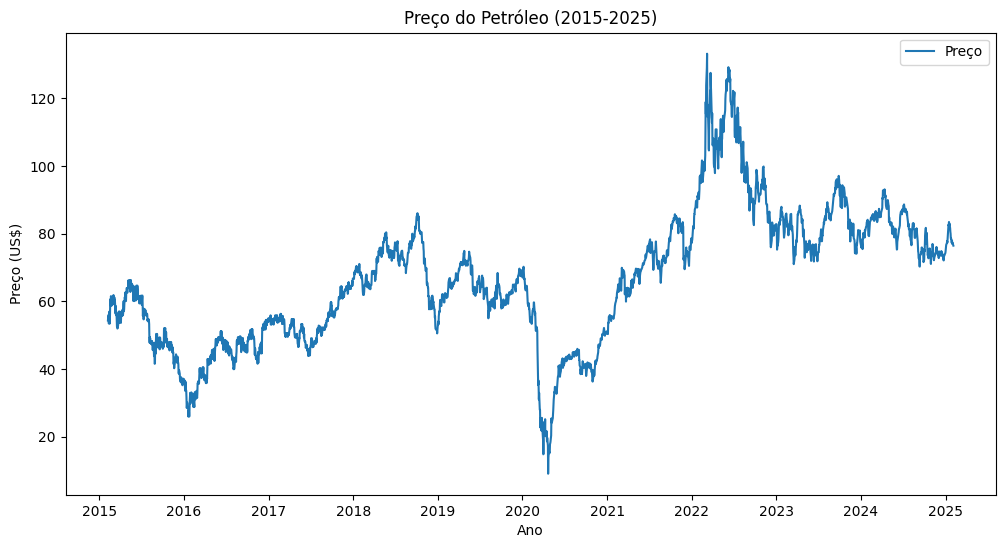

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df, label='Preço')
plt.title('Preço do Petróleo (2015-2025)')
plt.xlabel('Ano')
plt.ylabel('Preço (R$)')
plt.legend()
plt.show()

#### Análise de estatísticas descritivas: fornecem uma visão geral da distribuição dos dados, ajudando a identificar possíveis assimetrias ou outliers.

In [3]:
df.describe()

,preco
count,2929.000000
mean,64.755845
std,19.161079
min,9.120000
25%,49.600000
50%,63.690000
75%,77.370000
max,133.180000


#### Decomposição da série temporal: separar a série em componentes ajuda a entender melhor as influências individuais de tendência e sazonalidade.

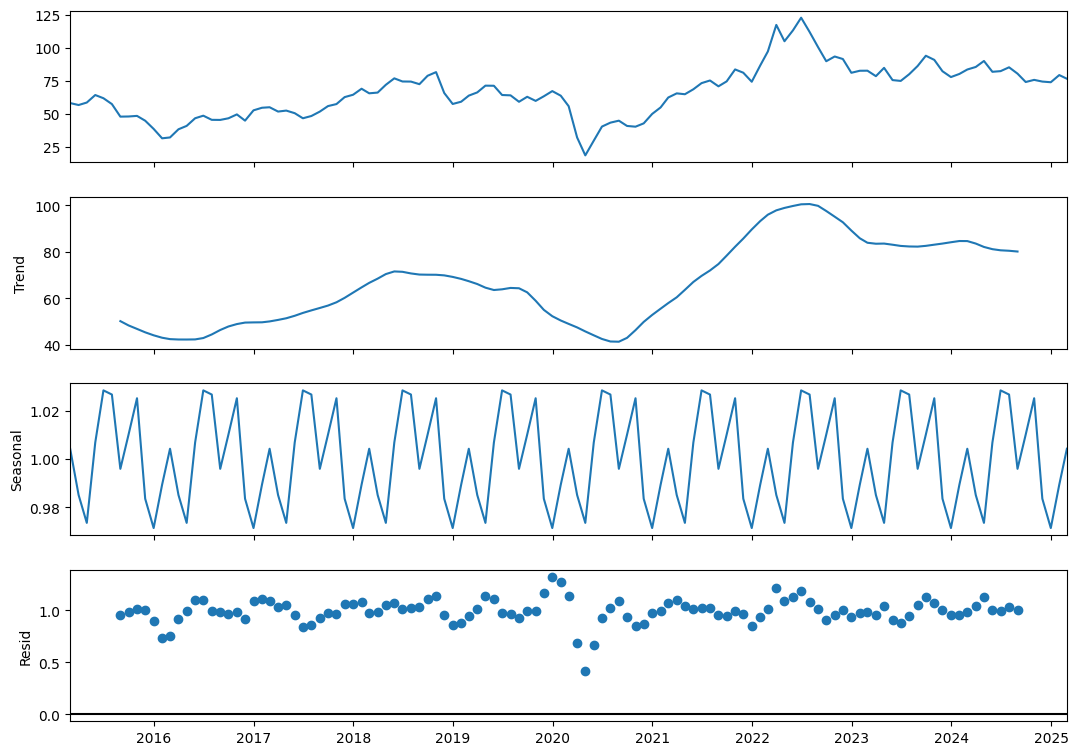

In [4]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_monthly, model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

#### Análise de Autocorrelação: as funções ACF e PACF ajudam a identificar a dependência temporal nos dados, essencial para a escolha de modelos de séries temporais.

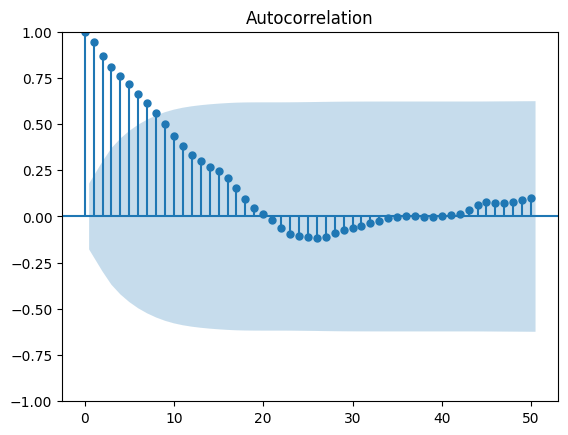

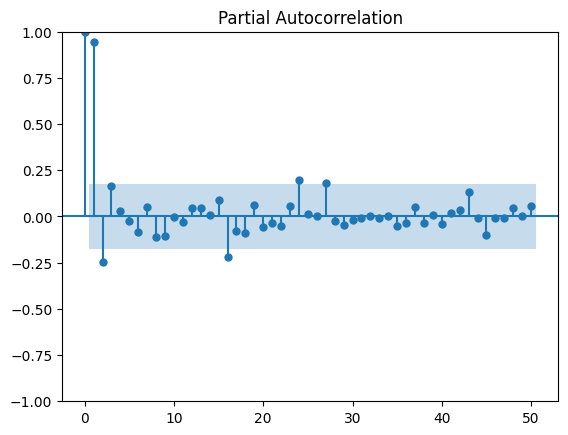

In [5]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Análise de autocorrelação
plot_acf(df_monthly, lags=50)
plt.show()

plot_pacf(df_monthly, lags=50)
plt.show()
